In [1]:
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (12, 6)

In [2]:
#! /usr/bin/env python

import pandas
import re
from nltk.tokenize import WhitespaceTokenizer
import matplotlib.pyplot as plt
import numpy as np
import csv

In [3]:
# =-=-=-=-=-=
# Read CSV into DataFrame and then create lists
# =-=-=-=-=-=

# Create pandas dataframe
colnames = ['index','citation','author','gender','title','date','length','text','occupation','numDate']
df = pandas.read_csv('../data/talks_6d.csv', names=colnames)
df = df.drop(df.index[0])
df.reset_index(inplace = True)

In [7]:
# pandas is dreadful about this
df = df.drop('index', axis= 1)

In [8]:
# Create list of talks
# talks = dfted.text.tolist()
df.head()

,citation,author,gender,title,date,length,text,occupation,numDate
0,Al Gore 2006,Al Gore,male,Averting the climate crisis,Jun 2006,957,Thank you so much Chris. And it's truly a gre...,Climate advocate,200606
1,David Pogue 2006,David Pogue,male,Simplicity sells,Jun 2006,1271,Hello voice mail my old friend. I've called f...,Technology columnist,200606
2,Cameron Sinclair 2006,Cameron Sinclair,male,My wish: A call for open-source architecture,Jul 2006,1398,I'm going to take you on a journey very quickl...,"Co-founder, Architecture for Humanity",200607
3,Sergey Brin + Larry Page 2007,Sergey Brin + Larry Page,male,The genesis of Google,May 2007,1205,Sergey Brin I want to discuss a question I kn...,NaN,200705
4,Nathalie Miebach 2011,Nathalie Miebach,female,Art made of storms,Oct 2011,247,What you just heard are the interactions of ba...,Artist,201110


In [9]:
# Lets count some words

talks = df.text.tolist()

# List of word counts for each talk 
counts = [len(WhitespaceTokenizer().tokenize(talk)) for talk in talks]
print("Of the {} talks, the shortest is {} words; the longest {}; and the average {}.".format(
    len(counts),min(counts), max(counts), int(np.mean(counts))))

Of the 2068 talks, the shortest is 353 words; the longest 6379; and the average 2115.


In [10]:
# Lets see if there are long talks
fourKs = []
for talk in talks:
    if len(WhitespaceTokenizer().tokenize(talk)) > 4000:
        fourKs.append(talks.index(talk))

print("There are ",len(fourKs)," talks of 4000+ words.", fourKs)

There are  40  talks of 4000+ words. [12, 55, 105, 469, 511, 556, 607, 672, 675, 686, 844, 921, 1084, 1097, 1130, 1256, 1290, 1294, 1334, 1341, 1344, 1346, 1358, 1365, 1372, 1374, 1393, 1410, 1422, 1428, 1454, 1455, 1530, 1563, 1635, 1726, 1728, 1758, 1881, 2001]


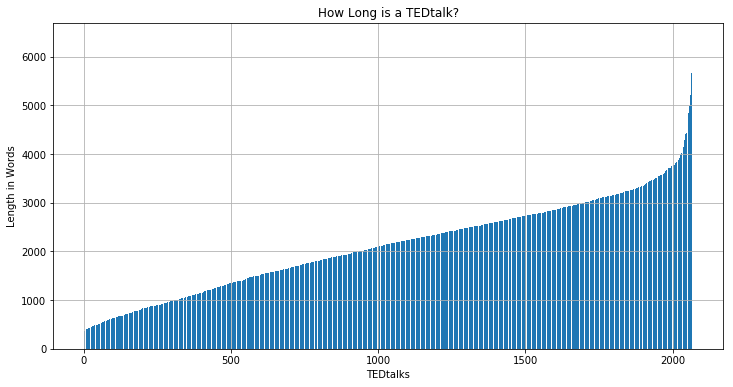

In [11]:
# =-=-=-=-=-=-=-=-=-=-=
# Plot of Word Lengths
# =-=-=-=-=-=-=-=-=-=-= 

length_sorted = sorted(counts)
#plt.plot(length_sorted)
#plt.plot(range(len(length_sorted)), length_sorted, marker='o', markersize=3, color="red")
plt.bar(range(len(length_sorted)), length_sorted)

plt.xlabel('TEDtalks')
plt.ylabel('Length in Words')
plt.title('How Long is a TEDtalk?')
plt.grid(True)
plt.show()

In [12]:
# =-=-=-=-=-=-=-=-=-=-=
# Corpus Word Frequencies: RAW
# =-=-=-=-=-=-=-=-=-=-= 

# Mash all the talks together & then tokenize
alltalks = " ".join(talks).lower()
tokens = WhitespaceTokenizer().tokenize(alltalks)

# Build a dictionary of words and their frequency in the corpus
word_freq = {}
for token in tokens:
    try:
        word_freq[token] += 1
    except: 
        word_freq[token] = 1

# Convert dictionary into a list of tuples
freq_list = [(val, key) for key, val in word_freq.items()]

# Sort with most frequent words at top
freq_list.sort(reverse=True)

print(len(tokens), len(freq_list))

4373823 76674


In [ ]:
# Write to file
with open('../outputs/word_freq.csv', 'w') as f:
        wtr = csv.writer(f)
        wtr.writerows(sorted(freq_list, reverse=True))
        f.close()

In [ ]:
# Number of words that occur once, twice, three times...
from collections import Counter
Counter(element[0] for element in freq_list)

In [14]:
# Sentences
import nltk

sentences = nltk.sent_tokenize(alltalks)

In [21]:
len(sentences)

251858

In [17]:
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
chunked_sentences = nltk.ne_chunk_sents(tagged_sentences, binary=True)

LookupError: 
**********************************************************************
  Resource
  'chunkers/maxent_ne_chunker/PY3/english_ace_binary.pickle' not
  found.  Please use the NLTK Downloader to obtain the resource:
  >>> nltk.download()
  Searched in:
    - '/Users/jjl5766/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************

In [ ]:
def extract_entity_names(t):
    entity_names = []

    if hasattr(t, 'label') and t.label:
        if t.label() == 'NE':
            entity_names.append(' '.join([child[0] for child in t]))
        else:
            for child in t:
                entity_names.extend(extract_entity_names(child))

    return entity_names

entity_names = []
for tree in chunked_sentences:
    # Print results per sentence
    # print extract_entity_names(tree)

    entity_names.extend(extract_entity_names(tree))

In [ ]:
# Print all entity names
print(len(entity_names)

# Print unique entity names
print set(entity_names)

In [18]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)

In [19]:
finder.apply_freq_filter(3)
finder.nbest(bigram_measures.pmi, 10)

[('ars', 'electronica'),
 ('bacillus', 'pasteurii'),
 ('bona', 'fide'),
 ('chez', 'panisse'),
 ('elinor', 'ostrom'),
 ('familia', 'michoacana'),
 ('jorge', 'luis'),
 ('marlene', 'dietrich.'),
 ('mato', 'grosso'),
 ('merci', 'beaucoup.')]

In [20]:
trifinder = TrigramCollocationFinder.from_words(tokens)
# scored = trifinder.score_ngrams(trigram_measures.raw_freq)
sorted(trifinder.nbest(trigram_measures.raw_freq, 2))

NameError: name 'trigram_measures' is not defined

## Quick Statistics for LA

In [22]:
# A quick count of genders

from collections import Counter

genders = df.gender.tolist()
Counter(item for item in genders)

Counter({'They (all male) - music group': 2,
         'both': 10,
         'female': 607,
         'gender non-binary': 1,
         'male': 1437,
         'they (both female)': 3,
         'they (male and female)': 4,
         'they (male and male)': 2,
         'they - group including at least one female': 1,
         'they - music group, all women': 1})

In [23]:
occupations = df.occupation.tolist()
set_occ = set(occupations)
len(set_occ)

1176

In [26]:
print(set_occ)

{nan, 'Entrepreneur', 'Scientist and biofuel guru', 'Corrections pioneer', 'Professor of molecular and cell biology', 'Roboticist ', 'Vagabond photojournalist + conceptual artist', 'Play researcher, psychiatrist', 'Inventor, ocean swimmer', 'Director of The British Museum', 'Social entrepreneur', 'Cloudspotter', 'Illustrator', 'Fiddler', 'Documentary photographer', 'Director and writer', 'Parents', 'photographer + visual artist', 'Ecological entomologist', 'Endocrinologist', 'Editorial cartoonist', 'Physicist, education activist', 'Computer theorist', 'Brain researcher', 'Recovering politician', 'Circular economy advocate', 'Plastics recycler', 'Designer, Storyteller', 'Human-rights activist', 'Speleologist', 'Mindfulness expert', 'Performance poet, multimedia artist', 'Planetary scientist', 'Disrupter', 'Mycologist', 'Psychologist; happiness expert', ' Chairman of the Cordoba Initiative', 'Child prodigy', 'International relations expert ', 'Blogger, digital visionary', 'Behavioral eco

In [ ]:
for talk in talks